In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Bejaia dataset - LDA

In [2]:
bejaia_df = pd.read_excel('BR_dataset.xlsx')

features = [
    "Temperature", "RH", "Ws", "Rain", "FWI",
    "FFMC", "DMC", "DC", "ISI", "BUI"
]

X_bejaia = bejaia_df[features]
y_bejaia = bejaia_df["Classes"]
y_bejaia = y_bejaia.str.strip()



In [3]:
print(np.unique(y_bejaia))


['fire' 'not fire']


(a) Compute class means


In [4]:
mean_vectors = []
for cl in np.unique(y_bejaia):
    mean_vectors.append(np.mean(X_bejaia[y_bejaia == cl], axis=0))
mean_vectors

[Temperature    32.881356
 RH             63.644068
 Ws             15.644068
 Rain            0.013559
 FWI            10.537288
 FFMC           86.579661
 DMC            19.472881
 DC             84.516949
 ISI             6.242373
 BUI            24.550847
 dtype: float64,
 Temperature    29.587302
 RH             72.031746
 Ws             16.333333
 Rain            1.619048
 FWI             0.933333
 FFMC           63.522222
 DMC             5.611111
 DC             23.795238
 ISI             1.233333
 BUI             6.880952
 dtype: float64]

(b) Calculate within-class and between-class scatter matrices


In [5]:
n_features = X_bejaia.shape[1]
S_W = np.zeros((n_features, n_features))
for cl, mv in zip(np.unique(y_bejaia), mean_vectors):
    class_scatter = np.cov(X_bejaia[y_bejaia == cl].T, bias=True)
    S_W += class_scatter * (X_bejaia[y_bejaia == cl].shape[0] - 1)

overall_mean = np.mean(X_bejaia, axis=0).to_numpy()  
S_B = np.zeros((n_features, n_features))
for i, mean_vec in enumerate(mean_vectors):
    n = X_bejaia[y_bejaia == y_bejaia[i]].shape[0]
    mean_vec_array = mean_vec.to_numpy()  
    mean_diff = (mean_vec_array - overall_mean).reshape(n_features, 1)
    S_B += n * mean_diff.dot(mean_diff.T)

(c) Solve the generalized eigenvalue problem for inv(S_W) * S_B

In [6]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)


(d) Project data onto lower-dimensional space

In [7]:
# Select top (num_classes - 1) eigenvectors for the projection matrix W
k = len(np.unique(y_bejaia)) - 1 

# Stack the top k eigenvectors to form transformation matrix W
W = np.hstack([eigen_pairs[i][1].reshape(n_features, 1) for i in range(k)])

# Project the original feature set X onto the new lower-dimensional space
X_lda = X_bejaia.dot(W)

# Confirm shape
print("Original shape:", X_bejaia.shape)
print("Transformed shape (X_lda):", X_lda.shape)


Original shape: (122, 10)
Transformed shape (X_lda): (122, 1)


(e) Visualize results

c:\Users\sp_kr\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\sp_kr\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
c:\Users\sp_kr\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axes\_axes.py:7004: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


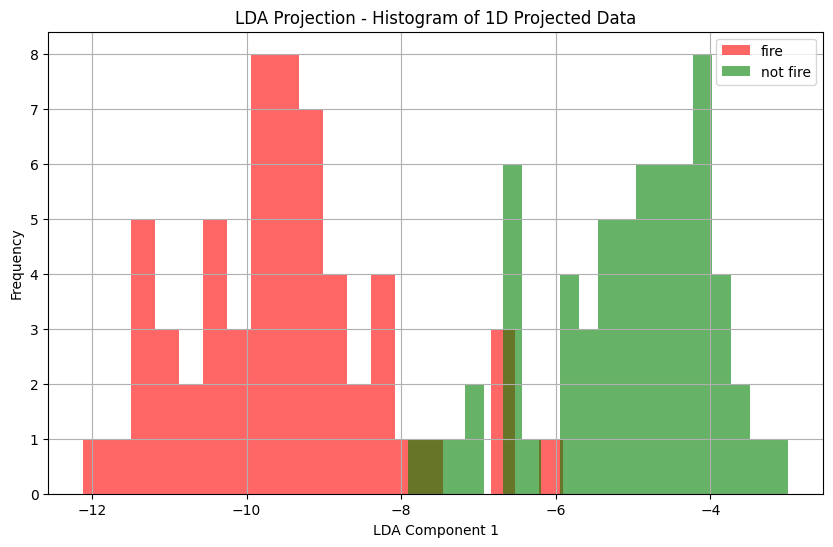

In [8]:

X_lda_np = X_lda.to_numpy().flatten()  # flatten for 1D plotting
labels_np = y_bejaia.to_numpy()

colors = {'fire': 'red', 'not fire': 'green'}


plt.figure(figsize=(10, 6))
for label in np.unique(labels_np):
    plt.hist(X_lda_np[labels_np == label],
             bins=20, alpha=0.6, label=label,
             color=colors[label])

plt.title("LDA Projection - Histogram of 1D Projected Data")
plt.xlabel("LDA Component 1")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


### Sidi Bel Abbes dataset - LDA

In [9]:
sbar_df = pd.read_excel('SBAR_dataset.xlsx')

features = [
    "Temperature", "RH", "Ws", "Rain", "FWI",
    "FFMC", "DMC", "DC", "ISI", "BUI"
]

X_sbar = sbar_df[features]
y_sbar = sbar_df["Classes"]
y_sbar = y_sbar.str.strip()



In [10]:
mean_vectors = []
for cl in np.unique(y_sbar):
    mean_vectors.append(np.mean(X_sbar[y_sbar == cl], axis=0))

In [11]:
n_features = X_sbar.shape[1]
S_W = np.zeros((n_features, n_features))
for cl, mv in zip(np.unique(y_sbar), mean_vectors):
    class_scatter = np.cov(X_sbar[y_sbar == cl].T, bias=True)
    S_W += class_scatter * (X_sbar[y_sbar == cl].shape[0] - 1)

overall_mean = np.mean(X_sbar, axis=0).to_numpy()  
S_B = np.zeros((n_features, n_features))
for i, mean_vec in enumerate(mean_vectors):
    n = X_sbar[y_sbar == y_sbar[i]].shape[0]
    mean_vec_array = mean_vec.to_numpy()  
    mean_diff = (mean_vec_array - overall_mean).reshape(n_features, 1)
    S_B += n * mean_diff.dot(mean_diff.T)

In [12]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)


In [13]:
# Select top (num_classes - 1) eigenvectors for the projection matrix W
k = len(np.unique(y_sbar)) - 1 

# Stack the top k eigenvectors to form transformation matrix W
W = np.hstack([eigen_pairs[i][1].reshape(n_features, 1) for i in range(k)])

# Project the original feature set X onto the new lower-dimensional space
X_lda = X_sbar.dot(W)

# Confirm shape
print("Original shape:", X_sbar.shape)
print("Transformed shape (X_lda):", X_lda.shape)


Original shape: (122, 10)
Transformed shape (X_lda): (122, 1)


c:\Users\sp_kr\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\sp_kr\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
c:\Users\sp_kr\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axes\_axes.py:7004: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


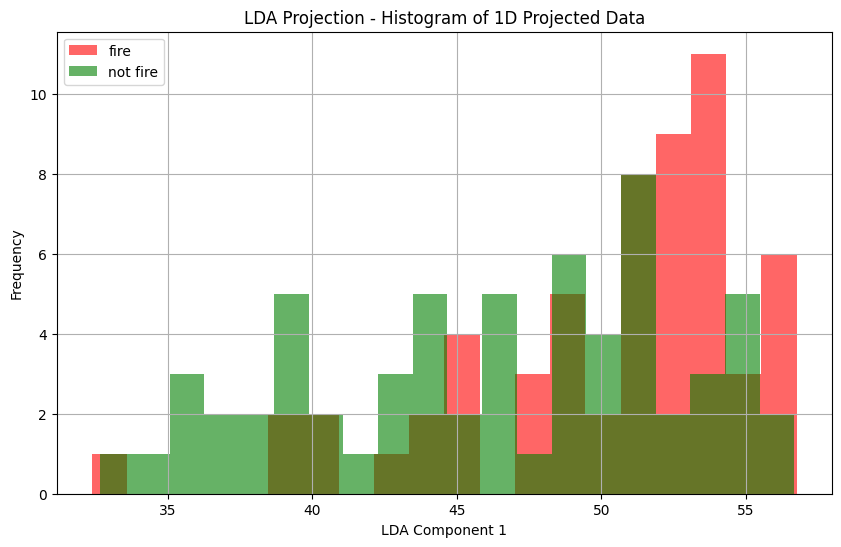

In [14]:

X_lda_np = X_lda.to_numpy().flatten()  # flatten for 1D plotting
labels_np = y_bejaia.to_numpy()

colors = {'fire': 'red', 'not fire': 'green'}


plt.figure(figsize=(10, 6))
for label in np.unique(labels_np):
    plt.hist(X_lda_np[labels_np == label],
             bins=20, alpha=0.6, label=label,
             color=colors[label])

plt.title("LDA Projection - Histogram of 1D Projected Data")
plt.xlabel("LDA Component 1")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()
